In [57]:
"""
How can we detect fake news and what can give us the best accuracy?

"""

'\nHow can we detect fake news and what can give us the best accuracy?\n\n'

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
"""
TfidTransformer = Used to transform a count matric (A matrix with the amount of words that appearing the article)

CountVectorizer = 

TfidVectorizer = 
"""
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
%load_ext autoreload
%autoreload 2



news_dataset = pd.read_csv("news_articles.csv")
news_dataset = news_dataset.fillna(' ')
news_dataset.dropna()

title_vector = news_dataset['title_without_stopwords']
text_vector = news_dataset["text_without_stopwords"]

news_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2091,-NO AUTHOR-,2016-10-27T15:36:10.573+03:00,teens walk free after gangrape conviction,,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_haunt...,bias,Real,good samaritan wearing indian headdress disarm...,,1.0
2092,-NO AUTHOR-,2016-10-27T15:36:10.671+03:00,school named for munichmassacre mastermind,,english,wnd.com,http://www.wnd.com/files/2016/10/rambo_richard...,bias,Real,skype sex scam fortune built shame,,1.0
2093,-NO AUTHOR-,2016-10-27T13:30:00.000+03:00,russia unveils satan missile,,english,wnd.com,http://www.wnd.com/files/2016/10/skype_sex_sca...,bs,Fake,cannabis aficionados develop thca crystalline ...,,1.0
2094,-NO AUTHOR-,2016-10-27T15:58:41.935+03:00,check out hillarythemed haunted house,,english,wnd.com,http://worldtruth.tv/wp-content/uploads/2016/1...,bs,Fake,title,,0.0


In [59]:
def real_tf(news_dataset):
    real_data = news_dataset["label"] == "Real"
    real_df = news_dataset[real_data]
    words = real_df["text_without_stopwords"]
   
       
    
    return word_count(words)

def fake_tf(news_dataset):
    fake_data = news_dataset["label"] == "Fake"
    fake_df = news_dataset[fake_data]
    words = fake_df["text_without_stopwords"]  
    return word_count(words)
 

def word_count(paragraphs):
    real = CountVectorizer()
    real.fit_transform(paragraphs)
    real_terms = real.transform(paragraphs)
    real_terms = real_terms.toarray()
    phrases = real.get_feature_names()
    length = len(real_terms[0])
    word_list = []
    j = 0 
    
    while j < length:
        count = 0
        for i in range(len(real_terms)):
            array = real_terms[i]
            word_count = array[j]
            count += word_count
        word_list.append(count)
        j += 1
    return word_list,phrases
        











In [60]:
real_words_count,real_words= real_tf(news_dataset)

In [61]:
fake_words_count,fake_words = fake_tf(news_dataset)

In [62]:
def title_real(news_dataset):
    real_data = news_dataset["label"] == "Real"
    real_df = news_dataset[real_data]
    title = real_df["title_without_stopwords"]
   
    return title_count(title)

def title_fake(news_dataset):
    fake_data = news_dataset["label"] == "Fake"
    fake_df = news_dataset[fake_data]
    title = fake_df["title_without_stopwords"]
    return title_count(title)

def title_count(titles):
    title = CountVectorizer()
    title.fit_transform(titles)
    title_terms = title.transform(titles)
    title_terms = title_terms.toarray()
    title_phrases = title.get_feature_names()
    title_length = len(title_terms[0])
    title_word_list = []
    j = 0 
    
    while j < title_length:
        count = 0
        for i in range(len(title_terms)):
            array = title_terms[i]
            word_count = array[j]
            count += word_count
        title_word_list.append(count)
        j += 1
    return title_word_list,title_phrases

In [63]:
real_titles_count,real_titles = title_real(news_dataset)

In [64]:
fake_titles_count,fake_titles = title_fake(news_dataset)

In [65]:
real_words_sorted = sorted(real_words_count)
real_word_list = real_words_sorted[-10:]
most_words_real = []
for i in range(len(real_word_list)):
    index_val = real_words_count.index(real_word_list[i])
    most_words_real.append(real_words[index_val])

fake_words_sorted = sorted(fake_words_count)
fake_word_list = fake_words_sorted[-10:]
most_words_fake = []
for i in range(len(fake_word_list)):
    index_val = fake_words_count.index(fake_word_list[i])
    most_words_fake.append(fake_words[index_val])

In [66]:
print(real_word_list, '\n', most_words_real)
print(fake_word_list, '\n', most_words_fake)

[648, 671, 757, 861, 947, 963, 980, 994, 1028, 1419] 
 ['also', 'like', 'hillary', 'would', 'one', 'said', 'us', 'people', 'clinton', 'trump']
[1001, 1085, 1277, 1290, 1352, 1365, 1369, 1421, 1963, 2024] 
 ['like', 'also', 'people', 'hillary', 'would', 'said', 'us', 'one', 'trump', 'clinton']


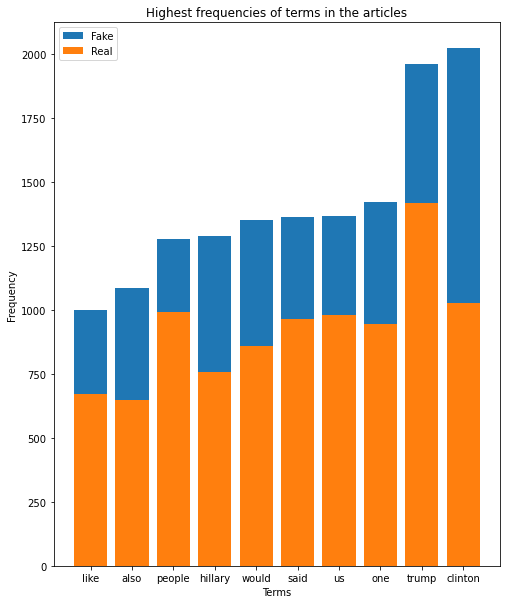

In [121]:
plt.figure(figsize = (8,10))
plt.bar(most_words_fake,fake_word_list, label = "Fake")
plt.bar(most_words_real,real_word_list, label = "Real")
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.title("Highest frequencies of terms in the articles")
plt.legend()

In [68]:
real_title_sorted = sorted(real_titles_count)
real_title_list = real_title_sorted[-10:]
most_titles_real = []
for i in range(len(real_title_list)):
    index_val = real_titles_count.index(real_title_list[i])
    most_titles_real.append(real_titles[index_val])

fake_titles_sorted = sorted(fake_titles_count)
fake_titles_list = fake_titles_sorted[-10:]
most_titles_fake = []
for i in range(len(fake_titles_list)):
    index_val = fake_titles_count.index(fake_titles_list[i])
    most_titles_fake.append(fake_titles[index_val])




In [69]:
print(real_title_list, '\n', most_titles_real)
print(fake_titles_list, '\n', most_titles_fake)


[30, 31, 31, 34, 35, 37, 64, 71, 89, 159] 
 ['donald', 'duke', 'duke', 'fbi', 'us', 'election', 'clinton', 'hillary', 'title', 'trump']
[44, 47, 51, 52, 57, 59, 98, 123, 128, 136] 
 ['news', 'life', 'election', 'gorafi', 'le', 'us', 'title', 'clinton', 'hillary', 'trump']


In [70]:
print(len(real_words_sorted))
print(len(fake_words_sorted))

25562
37161


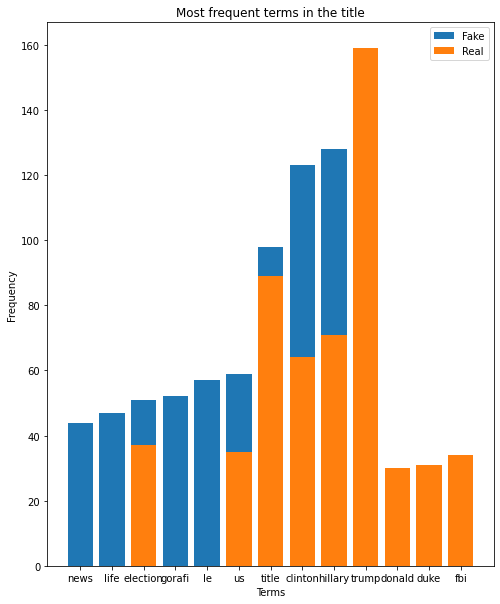

In [71]:
plt.figure(figsize = (8,10))
plt.bar(most_titles_fake,fake_titles_list, label = "Fake")
plt.bar(most_titles_real,real_title_list, label = 'Real')

plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.title("Most frequent terms in the title")
plt.legend()

In [145]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(text_vector)
term_matrix = count_vectorizer.transform(text_vector)
term_matrix = term_matrix.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [73]:

tfid = TfidfTransformer(norm = "l2")
tfid.fit(term_matrix)
tf_matrix = tfid.fit_transform(term_matrix)
tf_matrix.shape

(2096, 46794)

In [74]:
x = tf_matrix.toarray()
y = news_dataset["label"].copy()


In [75]:
X_train,X_test,y_train,y_test = train_test_split(tf_matrix, y,train_size = .5)

gnb = MultinomialNB()




In [76]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
count_one = 0
count_two = 0
for i in range(len(y_pred)):
    if y_pred[i] == "Real":
        count_one += 1
    elif y_pred[i] == "Fake":
        count_two += 1
print(f"Real occurred {count_one}. Fake occurred {count_two}")

Real occurred 21. Fake occurred 1027


Prediction with text: 0.6240458015267175


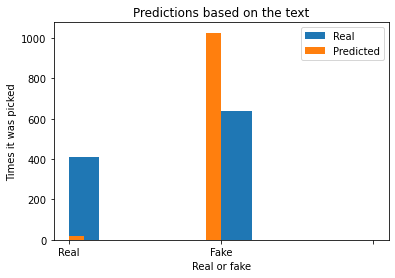

In [125]:
accuracy = gnb.score(X_test,y_test)
     
plt.hist(y_test,label = "Real")
plt.hist(y_pred, label = "Predicted")
plt.xlabel("Real or fake")
plt.ylabel("Times it was picked")
plt.title("Predictions based on the text")
print(f"Prediction with text: {accuracy}")
plt.legend()


In [129]:
title_vectorizer = CountVectorizer()
title_vectorizer.fit_transform(title_vector)
title_matrix = title_vectorizer.transform(title_vector)
title_matrix = title_matrix.toarray()


In [ ]:
title_id = TfidfTransformer(norm = "l2")
title_id.fit(title_matrix)
title_matrix = title_id.fit_transform(title_matrix)


In [130]:
x_titles = title_matrix.toarray()
x_title_train,x_title_test,y_title_train,y_title_test = train_test_split(x_titles,y,test_size = .5,random_state = 0)


title_gnb = MultinomialNB()
title_gnb.fit(x_title_train,y_title_train)
title_pred = title_gnb.predict(x_title_test)

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

Prediction with title: 0.6669847328244275


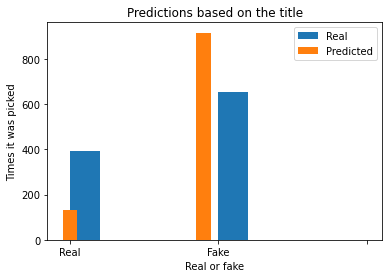

In [124]:
title_accuracy = title_gnb.score(x_title_test,y_title_test)
print(f"Prediction with title: {title_accuracy}")
plt.xlabel("Real or fake")
plt.ylabel("Times it was picked")
plt.hist(y_title_test, label = "Real",align = 'mid')
plt.hist(title_pred, label = "Predicted",align = 'left')
plt.title("Predictions based on the title")
plt.legend()

In [82]:
label = news_dataset['label']
label.value_counts()

Fake    1294
Real     801
           1
Name: label, dtype: int64

In [83]:
news_dataset

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2091,-NO AUTHOR-,2016-10-27T15:36:10.573+03:00,teens walk free after gangrape conviction,,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_haunt...,bias,Real,good samaritan wearing indian headdress disarm...,,1.0
2092,-NO AUTHOR-,2016-10-27T15:36:10.671+03:00,school named for munichmassacre mastermind,,english,wnd.com,http://www.wnd.com/files/2016/10/rambo_richard...,bias,Real,skype sex scam fortune built shame,,1.0
2093,-NO AUTHOR-,2016-10-27T13:30:00.000+03:00,russia unveils satan missile,,english,wnd.com,http://www.wnd.com/files/2016/10/skype_sex_sca...,bs,Fake,cannabis aficionados develop thca crystalline ...,,1.0
2094,-NO AUTHOR-,2016-10-27T15:58:41.935+03:00,check out hillarythemed haunted house,,english,wnd.com,http://worldtruth.tv/wp-content/uploads/2016/1...,bs,Fake,title,,0.0


In [101]:
false = news_dataset["label"] == "Fake"
false_dataset = news_dataset[false]
false_dataset = false_dataset[:800]

real = news_dataset["label"] == "Real"
real_dataset = news_dataset[real]

real_dataset = real_dataset.append(false_dataset)
updated_vector = real_dataset["text_without_stopwords"]
updated_vector

0      print pay back money plus interest entire fami...
1      attorney general loretta lynch plead fifth bar...
2      red state fox news sunday reported morning ant...
3      email kayla mueller prisoner tortured isis cha...
4      email healthcare reform make america great sin...
                             ...                        
973    zu wild geschaukelt spielendes kind stürzt ben...
974    freitag november musik statt lärm erster laubb...
975    samstag november schlagstöcke und pyrotechnik ...
976    morgen pams kommt die nächste flüchtlingswelle...
977    sonntag november forscher entdecken abgelegene...
Name: text_without_stopwords, Length: 1601, dtype: object

In [102]:
updated_vectorizer = CountVectorizer()
updated_vectorizer.fit_transform(updated_vector)
updated_matrix = updated_vectorizer.transform(updated_vector)
updated_matrix = updated_matrix.toarray()


In [103]:
updated_id = TfidfTransformer(norm = "l2")
updated_id.fit(updated_matrix)
updated_matrix = updated_id.fit_transform(updated_matrix)

In [104]:
x_updated = updated_matrix.toarray()
new_y = real_dataset['label']
x_updated_train,x_updated_test,y_updated_train,y_updated_test = train_test_split(x_updated,new_y,test_size = .5,random_state = 0)


updated_gnb = MultinomialNB()
updated_gnb.fit(x_updated_train,y_updated_train)
updated_pred = updated_gnb.predict(x_updated_test)




In [126]:
updated_accuracy = updated_gnb.score(x_updated_test,y_updated_test)
print(f"Prediction wtih updated dataset: {updated_accuracy}")

Prediction wtih updated dataset: 0.7940074906367042


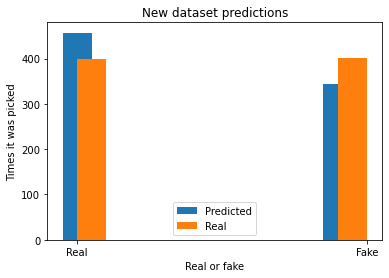

In [112]:
plt.xlabel("Real or fake")
plt.ylabel("Times it was picked")
plt.title("New dataset predictions")
plt.hist(updated_pred, label = "Predicted",align= 'left')
plt.hist(y_updated_test, label = "Real",align = "mid")
plt.legend()
